
# Find Shortest Path

Finding the shortest path between 2 nodes of a given graph
using `shortest_path` function.


['A', 'H', 'G', 'F', 'E']


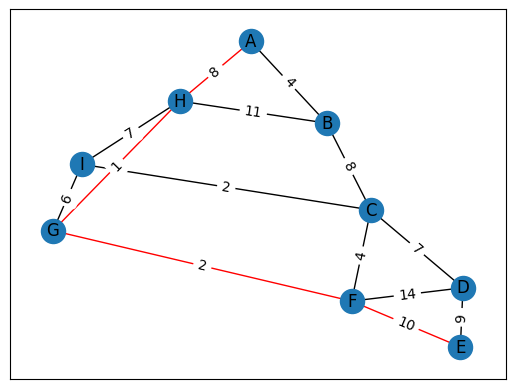

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph with nodes and edges
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G", "H"])
G.add_edge("A", "B", weight=4)
G.add_edge("A", "H", weight=8)
G.add_edge("B", "C", weight=8)
G.add_edge("B", "H", weight=11)
G.add_edge("C", "D", weight=7)
G.add_edge("C", "F", weight=4)
G.add_edge("C", "I", weight=2)
G.add_edge("D", "E", weight=9)
G.add_edge("D", "F", weight=14)
G.add_edge("E", "F", weight=10)
G.add_edge("F", "G", weight=2)
G.add_edge("G", "H", weight=1)
G.add_edge("G", "I", weight=6)
G.add_edge("H", "I", weight=7)

# Find the shortest path from node A to node E
path = nx.shortest_path(G, "A", "E", weight="weight")
print(path)

# Create a list of edges in the shortest path
path_edges = list(zip(path, path[1:]))

# Create a list of all edges, and assign colors based on whether they are in the shortest path or not
edge_colors = [
    "red" if edge in path_edges or tuple(reversed(edge)) in path_edges else "black"
    for edge in G.edges()
]

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos, edge_color=edge_colors)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edge_labels(
    G, pos, edge_labels={(u, v): d["weight"] for u, v, d in G.edges(data=True)}
)

plt.show()

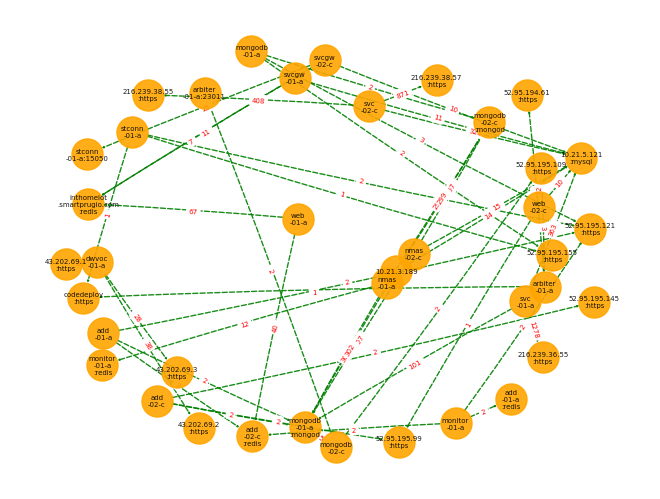

In [29]:

### for get netstat data and save graph.txt ###
# ========== For get netstat run command and save with graph.txt ========

# IPADDR=$(ifconfig eth0 |grep inet|awk '{print $2}')
# echo;echo \#$HOSTNAME; netstat -anpo |egrep -v LISTEN |egrep ^tcp|egrep "goodfys|java|beam|mongo|pips|redis|https|:(80|443|3011|3306|23011) " | awk '{print $5}' | sort -n |uniq -c |sort --key=1 -nr |head -3|awk '{print $2,$1}' |sed "s/^/$IPADDR /g"

# ===========================================================
# # 실행서버 호스트네임
# # 본인IP 연결많은IP:포트 연결카운트
# 10.21.3.208 10.21.4.67:23010 363
# 10.21.3.208 10.21.3.122:23010 67
# 10.21.3.208 10.21.4.24:3010 40


import networkx as nx
import matplotlib.pyplot as plt

# Create a graph with nodes and edges
#G = nx.Graph()
G = nx.DiGraph()

#G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G", "H"])

dns_name_map = {
    
    "52.95.195.138:443" : "codedeploy\n:https",
    
    "10.21.3.36": "add\n-01-a",
    "10.21.4.24": "add\n-02-c",
    "10.21.5.233": "arbiter\n-01-a",
    "10.21.3.45" : "dwvoc\n-01-a",
    "10.21.5.149"  : "mongodb\n-01-a",
    "10.21.6.47" : "mongodb\n-02-c",
    "10.21.3.23" : "monitor\n-01-a",
    "10.21.3.181" : "nmas\n-01-a",
    "10.21.4.218" : "nmas\n-02-c",
    "10.21.3.42" : "stconn\n-01-a",
    "10.21.3.146" : "svc\n-01-a",
    "10.21.4.103" : "svc\n-02-c",
    "10.21.3.133" : "svcgw\n-01-a",
    "10.21.4.120" : "svcgw\n-02-c",
    "10.21.3.208" : "web\n-01-a",
    "10.21.4.200" : "web\n-02-c",
    
    
    # 단지미들에서 스마트홈 이벤트 발송
    # "52.78.47.53" : "homeiot.prugio.com",
    "52.78.47.53" : "homeiot.smartprugio.com",
    # "52.78.47.53" : "voc.smartprugio.com",
    # "52.78.47.53" : "store.smartprugio.com",
    # "52.78.47.53" : "adm.smartprugio.com",
    # "52.78.47.53" : "svc.smartprugio.com",
    
    "43.201.220.157" : "homeiot.smartprugio.com",
    # "43.201.220.157" : "homeiot.prugio.com",    
    # "43.201.220.157" : "voc.smartprugio.com",
    # "43.201.220.157" : "adm.smartprugio.com",
    # "43.201.220.157" : "svc.smartprugio.com",
    
    "10.21.3.122" : "inthomeiot\n.smartprugio.com",
    "10.21.4.67" : "inthomeiot\n.smartprugio.com",
    
}

port_service_map = {
    ":23010": "\n:redis",
    ":3010": "\n:redis",
    ":3020": "\n:redis",
    ":3011": "\n:mongod",
    ":443": "\n:https",
    ":80": "\n:http",
    ":3306": "\n:mysql",
    ":61613" : "\n:activemq",
    ":61616" : "\n:activemq",
    ":5672" : "\n:rabbitmq",
    ":6379" : "\n:redis",
}

# 결과를 저장할 리스트 초기화
filtered_lines = []
with open('netstat.txt', 'r') as file:
#with open('netstat_240401.txt', 'r') as file:
    for line in file:
        # .strip()을 사용해 줄 앞뒤의 공백을 제거합니다.
        stripped_line = line.strip()

        # 줄이 비어있거나 '#'으로 시작하지 않는 경우에만 리스트에 추가합니다.
        if stripped_line and not stripped_line.startswith('#'):
            filtered_lines.append(stripped_line)


for line in filtered_lines:
    line = line.strip().split()
    # print(f"line[0]: {line[0]}, line[1]: {line[1]}, line[2]: {line[2]}")
    ValueOne = line[0]
    ValueTwo = line[1]
    
    # SERVER have : string like IP:PORT
    if ":" in ValueOne:
        SERVER = ValueOne
        CLIENT = ValueTwo
    elif ":" in ValueTwo:
        SERVER = ValueTwo
        CLIENT = ValueOne
    
    # Replace the IP addresses with the EC2 names
    for key, value in dns_name_map.items():
        SERVER = SERVER.replace(key, value)
        CLIENT = CLIENT.replace(key, value)

    # Replace the port numbers with the service names
    for key, value in port_service_map.items():
        SERVER = SERVER.replace(key, value)

    #SRC = SRC.replace(":23010", "redis").replace(":3010", "redis").replace(":3011","mongodb")

    G.add_edge(SERVER, CLIENT, weight=int(line[2]))

# Reverse the direction of the graph ( CLIENT -> SERVER )
G_reversed = nx.reverse(G)

# Visualize the graph : 인스턴스=node, 연결선=edge
pos = nx.spring_layout(G_reversed, k=3.5)
nx.draw(G_reversed, pos, with_labels=True, node_size=500, node_color="orange", font_size=5, font_color="black", font_weight="light", \
    edge_color="green", width=1, style="dashed", alpha=0.9, arrowsize=2, arrowstyle="->", connectionstyle="arc3,rad=0.01", \
        min_source_margin=5, min_target_margin=5, label="test")


# Draw edge labels
edge_labels = nx.get_edge_attributes(G_reversed, "weight")


# Visualize the graph with modified edge labels
nx.draw_networkx_edge_labels(G_reversed, pos, edge_labels=edge_labels, font_size=5, font_color="red")
plt.savefig('plot.png', dpi=300)

plt.show()
#----------------------------------------------#

In [122]:
# 결과를 저장할 리스트 초기화
filtered_lines = []

with open('netstat.txt', 'r') as file:
    for line in file:
        # .strip()을 사용해 줄 앞뒤의 공백을 제거합니다.
        stripped_line = line.strip()

        # 줄이 비어있거나 '#'으로 시작하지 않는 경우에만 리스트에 추가합니다.
        if stripped_line and not stripped_line.startswith('#'):
            filtered_lines.append(stripped_line)

print(filtered_lines)

['10.21.3.36 10.21.4.24:3010 3', '10.21.3.36 52.95.195.121:443 2', '10.21.3.36 10.21.5.149:3011 2', '10.21.4.24 52.95.195.99:443 2', '10.21.4.24 52.95.195.145:443 2', '10.21.4.24 10.21.5.149:3011 2', '10.21.5.233 52.95.195.109:443 3', '10.21.5.233 52.95.195.138:443 1', '10.21.5.233 52.95.194.61:443 1', '10.21.3.45 43.202.69.2:443 38', '10.21.3.45 43.202.69.3:443 28', '10.21.3.45 43.202.69.1:443 22', '10.21.5.149 52.95.195.121:443 3', '10.21.5.149 52.95.195.155:443 2', '10.21.5.149 10.21.6.47:3011 2', '10.21.6.47 10.21.5.149:3011 5', '10.21.6.47 52.95.195.109:443 2', '10.21.6.47 10.21.5.233:23011 2', '10.21.3.23 52.95.195.121:443 2', '10.21.3.23 10.21.4.24:3010 2', '10.21.3.23 10.21.3.36:3010 2', '10.21.3.181 10.21.5.149:3011 306', '10.21.3.181 10.21.6.47:3011 299', '10.21.3.181 10.21.3.23:23010 12', '10.21.4.218 10.21.6.47:3011 497', '10.21.4.218 10.21.5.149:3011 307', '10.21.4.218 10.21.5.121:3306 15', '10.21.3.189 10.21.5.149:3011 302', '10.21.3.189 10.21.6.47:3011 299', '10.21.3.189

In [14]:
print(G_reversed.number_of_edges())
print(G_reversed.number_of_nodes())

49
39


NetworkXError: Node '52.95.195.99\n:https' has no position.

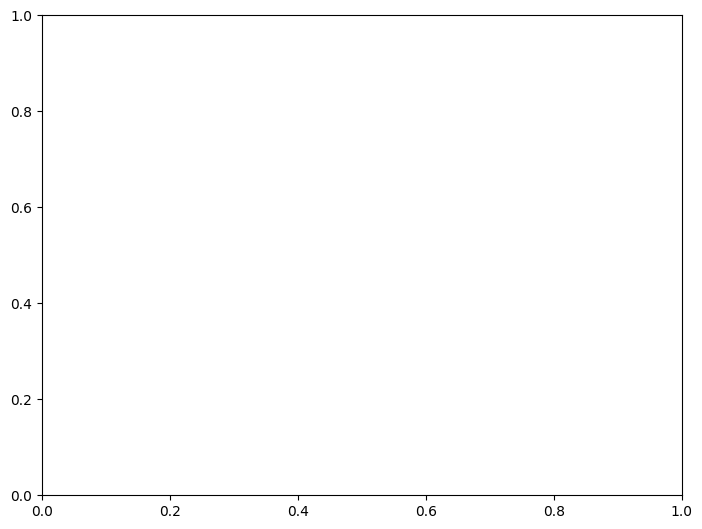

In [140]:

### for get netstat data and save graph.txt ###
# ========== For get netstat run command and save with graph.txt ========

# IPADDR=$(ifconfig eth0 |grep inet|awk '{print $2}')
# echo;echo \#$HOSTNAME; netstat -anpo |egrep -v LISTEN |egrep ^tcp|egrep "goodfys|java|beam|mongo|pips|redis|https|:(80|443|3011|3306|23011) " | awk '{print $5}' | sort -n |uniq -c |sort --key=1 -nr |head -3|awk '{print $2,$1}' |sed "s/^/$IPADDR /g"

# ===========================================================
# # 실행서버 호스트네임
# # 본인IP 연결많은IP:포트 연결카운트
# 10.21.3.208 10.21.4.67:23010 363
# 10.21.3.208 10.21.3.122:23010 67
# 10.21.3.208 10.21.4.24:3010 40


import networkx as nx
import matplotlib.pyplot as plt

# Create a graph with nodes and edges
#G = nx.Graph()
G = nx.DiGraph()

#G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G", "H"])

    
#    "52.95.195.138:443" : "codedeploy-agent:https",
    

dns_name_map = {
    "10.21.3.36": "add\n-01-a",
    "10.21.4.24": "add\n-02-c",
    "10.21.5.233": "arbiter\n-01-a",
    "10.21.3.45" : "dwvoc\n-01-a",
    "10.21.5.149"  : "mongodb\n-01-a",
    "10.21.6.47" : "mongodb\n-02-c",
    "10.21.3.23" : "monitor\n-01-a",
    "10.21.3.181" : "nmas\n-01-a",
    "10.21.4.218" : "nmas\n-02-c",
    "10.21.3.42" : "stconn\n-01-a",
    "10.21.3.146" : "svc\n-01-a",
    "10.21.4.103" : "svc\n-02-c",
    "10.21.3.133" : "svcgw\n-01-a",
    "10.21.4.120" : "svcgw\n-02-c",
    "10.21.3.208" : "web\n-01-a",
    "10.21.4.200" : "web\n-02-c",
    
    
    # 단지미들에서 스마트홈 이벤트 발송
    "52.78.47.53" : "homeiot.prugio.com",
    "43.201.220.157" : "homeiot.prugio.com",
    
    "52.78.47.53" : "homeiot.smartprugio.com",
    "43.201.220.157" : "homeiot.smartprugio.com",
    
    "52.78.47.53" : "voc.smartprugio.com",
    "52.78.47.53" : "store.smartprugio.com",
    "52.78.47.53" : "adm.smartprugio.com",
    "52.78.47.53" : "svc.smartprugio.com",
    
    "43.201.220.157" : "voc.smartprugio.com",
    "43.201.220.157" : "adm.smartprugio.com",
    "43.201.220.157" : "svc.smartprugio.com",
    
    "10.21.3.122" : "inthomeiot.smartprugio.com",
    "10.21.4.67" : "inthomeiot.smartprugio.com",
    
}

port_service_map = {
    ":23010": "\n:redis",
    ":3010": "\n:redis",
    ":3020": "\n:redis",
    ":3011": "\n:mongod",
    ":443": "\n:https",
    ":80": "\n:http",
    ":3306": "\n:mysql",
    ":61613" : "\n:activemq",
    ":61616" : "\n:activemq",
    ":5672" : "\n:rabbitmq",
    ":6379" : "\n:redis",
}


with open("netstat_240401.txt") as f:
    for line in f:
        line = line.strip().split()
        if "#" in line:
            continue
        elif len(line) <= 0:
            continue
        
        ValueOne = line[0]
        ValueTwo = line[1]
        
        # SERVER have : string like IP:PORT
        if ":" in ValueOne:
            SERVER = ValueOne
            CLIENT = ValueTwo
        elif ":" in ValueTwo:
            SERVER = ValueTwo
            CLIENT = ValueOne
        
        # Replace the IP addresses with the EC2 names
        for key, value in dns_name_map.items():
            SERVER = SERVER.replace(key, value)
            CLIENT = CLIENT.replace(key, value)

        # Replace the port numbers with the service names
        for key, value in port_service_map.items():
            SERVER = SERVER.replace(key, value)

        #SRC = SRC.replace(":23010", "redis").replace(":3010", "redis").replace(":3011","mongodb")

        G.add_edge(SERVER, CLIENT, weight=int(line[2]))

# Reverse the direction of the graph ( CLIENT -> SERVER )
G_reversed = nx.reverse(G)

# Visualize the graph : 인스턴스=node, 연결선=edge
nx.draw(G_reversed, pos, with_labels=True, node_size=2000, node_color="orange", font_size=8, font_color="black", font_weight="light", \
    edge_color="green", width=2, style="dashed", alpha=0.9, arrowsize=20, arrowstyle="->", connectionstyle="arc3,rad=0.01", \
        min_source_margin=10, min_target_margin=10, label="test")


# Draw edge labels
edge_labels = nx.get_edge_attributes(G_reversed, "weight")
nx.draw_networkx_edge_labels(G_reversed, pos, edge_labels=edge_labels)

plt.show()
#----------------------------------------------#

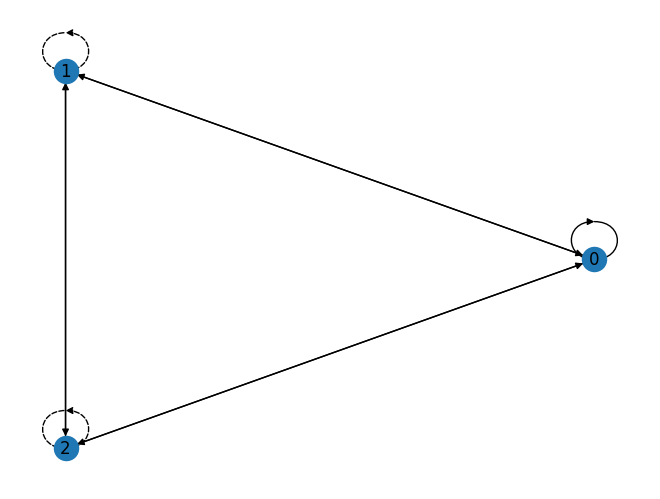

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph and add a self-loop to node 0
G = nx.complete_graph(3, create_using=nx.DiGraph)
G.add_edge(0, 0)
pos = nx.circular_layout(G)

# As of version 2.6, self-loops are drawn by default with the same styling as
# other edges
nx.draw(G, pos, with_labels=True)

# Add self-loops to the remaining nodes
edgelist = [(1, 1), (2, 2)]
G.add_edges_from(edgelist)

# Draw the newly added self-loops with different formatting
nx.draw_networkx_edges(G, pos, edgelist=edgelist, arrowstyle="<|-", style="dashed")

plt.show()
